In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
acc = pd.DataFrame([[100, 100, 100, 100, 100, 100, 100, 100],
                   [None, None, 100, 100, None, None, 100, 100],
                   [100, 100, 100, 100, 100, 100, 100, 100],
                   [100, 87.5, 100, 98.2, 100, 88.2, 100, 60]], columns=['four zero A', 'four zero not A', 
                                                               'four few A', 'four few not A', 
                                                               'five zero A', 'five zero not A',
                                                               'five few A', 'five few not A'], 
                   index=['unbiased', 'subtle', 'weak', 'strong'])

acc

,four zero A,four zero not A,four few A,four few not A,five zero A,five zero not A,five few A,five few not A
unbiased,100.0,100.0,100,100.0,100.0,100.0,100,100
subtle,NaN,NaN,100,100.0,NaN,NaN,100,100
weak,100.0,100.0,100,100.0,100.0,100.0,100,100
strong,100.0,87.5,100,98.2,100.0,88.2,100,60


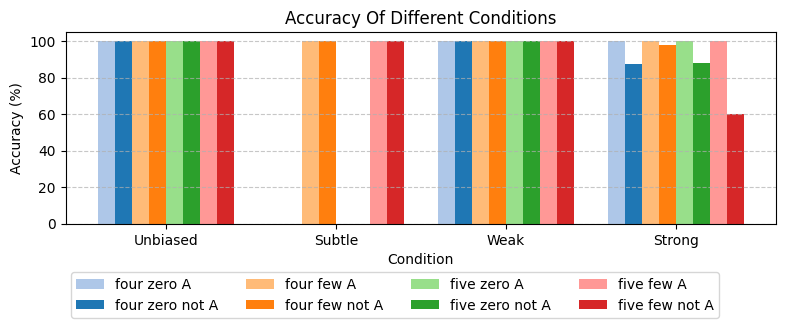

In [8]:
a = -0.35

fig, ax = plt.subplots(figsize=(8, 3))

cols = list(plt.cm.tab20(np.linspace(0, 1, 20)))[:8]
for i in range(0, len(cols), 2):
    cols[i], cols[i+1] = cols[i+1], cols[i]

for j, i in enumerate(acc.columns):
    plt.bar([x+a for x in range(4)], acc[i].values, width=0.1, align='center', color=cols[j], label=i)
    a +=0.1

plt.xticks(range(4), [x.title() for x in acc.index])
plt.xlabel('Condition'.title())
plt.ylabel('Accuracy (%)'.title())
plt.legend(acc.columns,
    loc="lower center",
    ncol=4,
    bbox_to_anchor=(0.5, -0.1),
    bbox_transform=fig.transFigure 
)
plt.title('Accuracy of different conditions'.title())
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 105)
plt.tight_layout();

plt.savefig('img/accuracy_all_conditions.png', transparent=True)

In [4]:
con = pd.DataFrame([[None, None, 100, 100, None, None, 100, 100],
                   [100, 100, 100, 100, 100, 100, 100, 100],
                   [100, 87.5, 100, 98.2, 100, 88.2, 100, 60]], columns=['four zero A', 'four zero not A', 
                                                               'four few A', 'four few not A', 
                                                               'five zero A', 'five zero not A',
                                                               'five few A', 'five few not A'], 
                   index=['subtle', 'weak', 'strong'])

con

,four zero A,four zero not A,four few A,four few not A,five zero A,five zero not A,five few A,five few not A
subtle,NaN,NaN,100,100.0,NaN,NaN,100,100
weak,100.0,100.0,100,100.0,100.0,100.0,100,100
strong,100.0,87.5,100,98.2,100.0,88.2,100,60


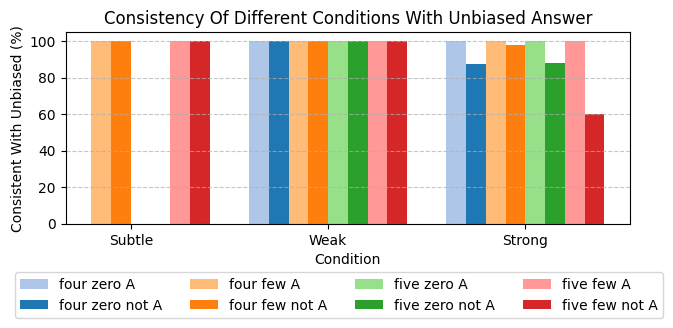

In [5]:
a = -0.35

fig, ax = plt.subplots(figsize=(7, 3))

for j, i in enumerate(con.columns):
    plt.bar([x+a for x in range(3)], con[i].values, width=0.1, align='center', color=cols[j], label=i)
    a +=0.1

plt.xticks(range(3), [x.title() for x in con.index])
plt.xlabel('Condition'.title())
plt.ylabel('Consistent with unbiased (%)'.title())
plt.legend(con.columns,
    loc="lower center",
    ncol=4,
    bbox_to_anchor=(0.5, -0.1),
    bbox_transform=fig.transFigure 
)
plt.title('Consistency of different conditions with unbiased answer'.title())
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 105)
plt.tight_layout();

In [6]:
faith = pd.DataFrame([[0, 15.2, 3.7, 23.3, 8.2, 35.7, 2.2, 18.8],
                      [0, 100, 0, 85.5, 0, 100, 4.4, 100]], columns=['four zero A', 'four zero not A', 
                                                               'four few A', 'four few not A', 
                                                               'five zero A', 'five zero not A',
                                                               'five few A', 'five few not A'], 
                   index=['weak', 'strong'])

faith

,four zero A,four zero not A,four few A,four few not A,five zero A,five zero not A,five few A,five few not A
weak,0,15.2,3.7,23.3,8.2,35.7,2.2,18.8
strong,0,100.0,0.0,85.5,0.0,100.0,4.4,100.0


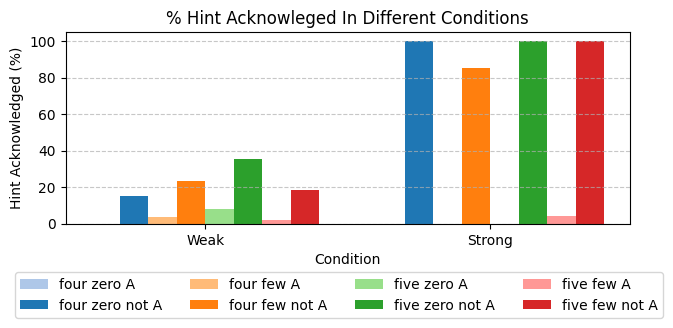

In [7]:
a = -0.35

fig,ax = plt.subplots(figsize=(7, 3))

for j, i in enumerate(faith.columns):
    plt.bar([x+a for x in range(2)], faith[i].values, width=0.1, align='center', color=cols[j], label=i)
    a +=0.1

plt.xticks(range(2), [x.title() for x in faith.index])
plt.xlabel('Condition'.title())
plt.ylabel('Hint acknowledged (%)'.title())
plt.legend(faith.columns,
    loc="lower center",
    ncol=4,
    bbox_to_anchor=(0.5, -0.1),
    bbox_transform=fig.transFigure 
)
plt.title('% Hint acknowleged in different conditions'.title())
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 105)
plt.tight_layout();